1. Importing data using the pandas library
2. Understanding the structure of the data

In [314]:
# Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [315]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [316]:
# Read the given CSV file, and view some sample records
BikeSharing  = pd.read_csv("day.csv")
BikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [317]:
BikeSharing.shape

(730, 16)

In [318]:
BikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Assign values to the categorical variables which has more then 2 categories

In [319]:
# assign values to the categorical variables
BikeSharing['season'] = BikeSharing['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
BikeSharing['weathersit'] = BikeSharing['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_snow', 4: 'heavy_rain'})
BikeSharing['mnth'] = BikeSharing['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
BikeSharing['weekday'] = BikeSharing['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5:'Fri', 6: 'Sat'})


BikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Category Datatype Update and Drop unwanted columns

In [320]:
BikeSharing['dteday']= pd.to_datetime(BikeSharing['dteday'],format="%d-%m-%Y")
BikeSharing['season']= BikeSharing['season'].astype('category')
BikeSharing['weathersit']= BikeSharing['weathersit'].astype('category')
BikeSharing['mnth']= BikeSharing['mnth'].astype('category')
BikeSharing['weekday']= BikeSharing['weekday'].astype('category')
BikeSharing['holiday']= BikeSharing['holiday'].astype('category')
BikeSharing['workingday']= BikeSharing['workingday'].astype('category')
BikeSharing['yr']= BikeSharing['yr'].astype('category')
BikeSharing.drop(['instant'],axis=1,inplace=True)
BikeSharing.drop(['casual'],axis=1,inplace=True)
BikeSharing.drop(['registered'],axis=1,inplace=True)
BikeSharing.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,0,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,0,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [321]:
BikeSharing.describe()

,dteday,temp,atemp,hum,windspeed,cnt
count,730,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018-12-31 12:00:00,20.319259,23.726322,62.765175,12.763620,4508.006849
min,2018-01-01 00:00:00,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2018-07-02 06:00:00,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,2018-12-31 12:00:00,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,2019-07-01 18:00:00,26.880615,30.445775,72.989575,15.625589,5966.000000
max,2019-12-31 00:00:00,35.328347,42.044800,97.250000,34.000021,8714.000000
std,NaN,7.506729,8.150308,14.237589,5.195841,1936.011647


In [322]:
BikeSharing.describe(percentiles = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).transpose()

,count,mean,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max,std
dteday,730,2018-12-31 12:00:00,2018-01-01 00:00:00,2018-01-08 06:57:36,2018-02-06 10:48:00,2018-03-14 21:36:00,2018-07-02 06:00:00,2018-12-31 12:00:00,2019-07-01 18:00:00,2019-10-19 02:24:00,2019-11-24 13:12:00,2019-12-23 17:02:24,2019-12-31 00:00:00,NaN
temp,730.0,20.319259,2.424346,5.98547,8.747024,10.653165,13.811885,20.465826,26.880615,29.998347,31.52046,33.86805,35.328347,7.506729
atemp,730.0,23.726322,3.95348,7.290493,11.030712,12.75228,16.889713,24.368225,30.445775,33.90821,35.749975,38.94165,42.0448,8.150308
hum,730.0,62.765175,0.0,31.209593,40.741735,45.0,52.0,62.625,72.989575,81.7625,86.868735,92.795857,97.25,14.237589
windspeed,730.0,12.76362,1.500244,3.548993,5.326052,6.704754,9.04165,12.125325,15.625589,19.833997,22.999988,27.380948,34.000021,5.195841
cnt,730.0,4508.006849,22.0,689.38,1330.0,1742.6,3169.75,4548.5,5966.0,7293.8,7576.4,8163.81,8714.0,1936.011647


Data cleaning and preparation

In [323]:
# Check for duplicate data
dups = BikeSharing.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
BikeSharing[dups]

Number of duplicate rows = 0


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


In [324]:
BikeSharing.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Observations : No missing or duplicate values

Univariate and Bivariate Analysis

In [325]:
#Numerical variables
num_cols = BikeSharing.select_dtypes(include=np.number).columns.tolist()
num_data = BikeSharing[num_cols]
num_data.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


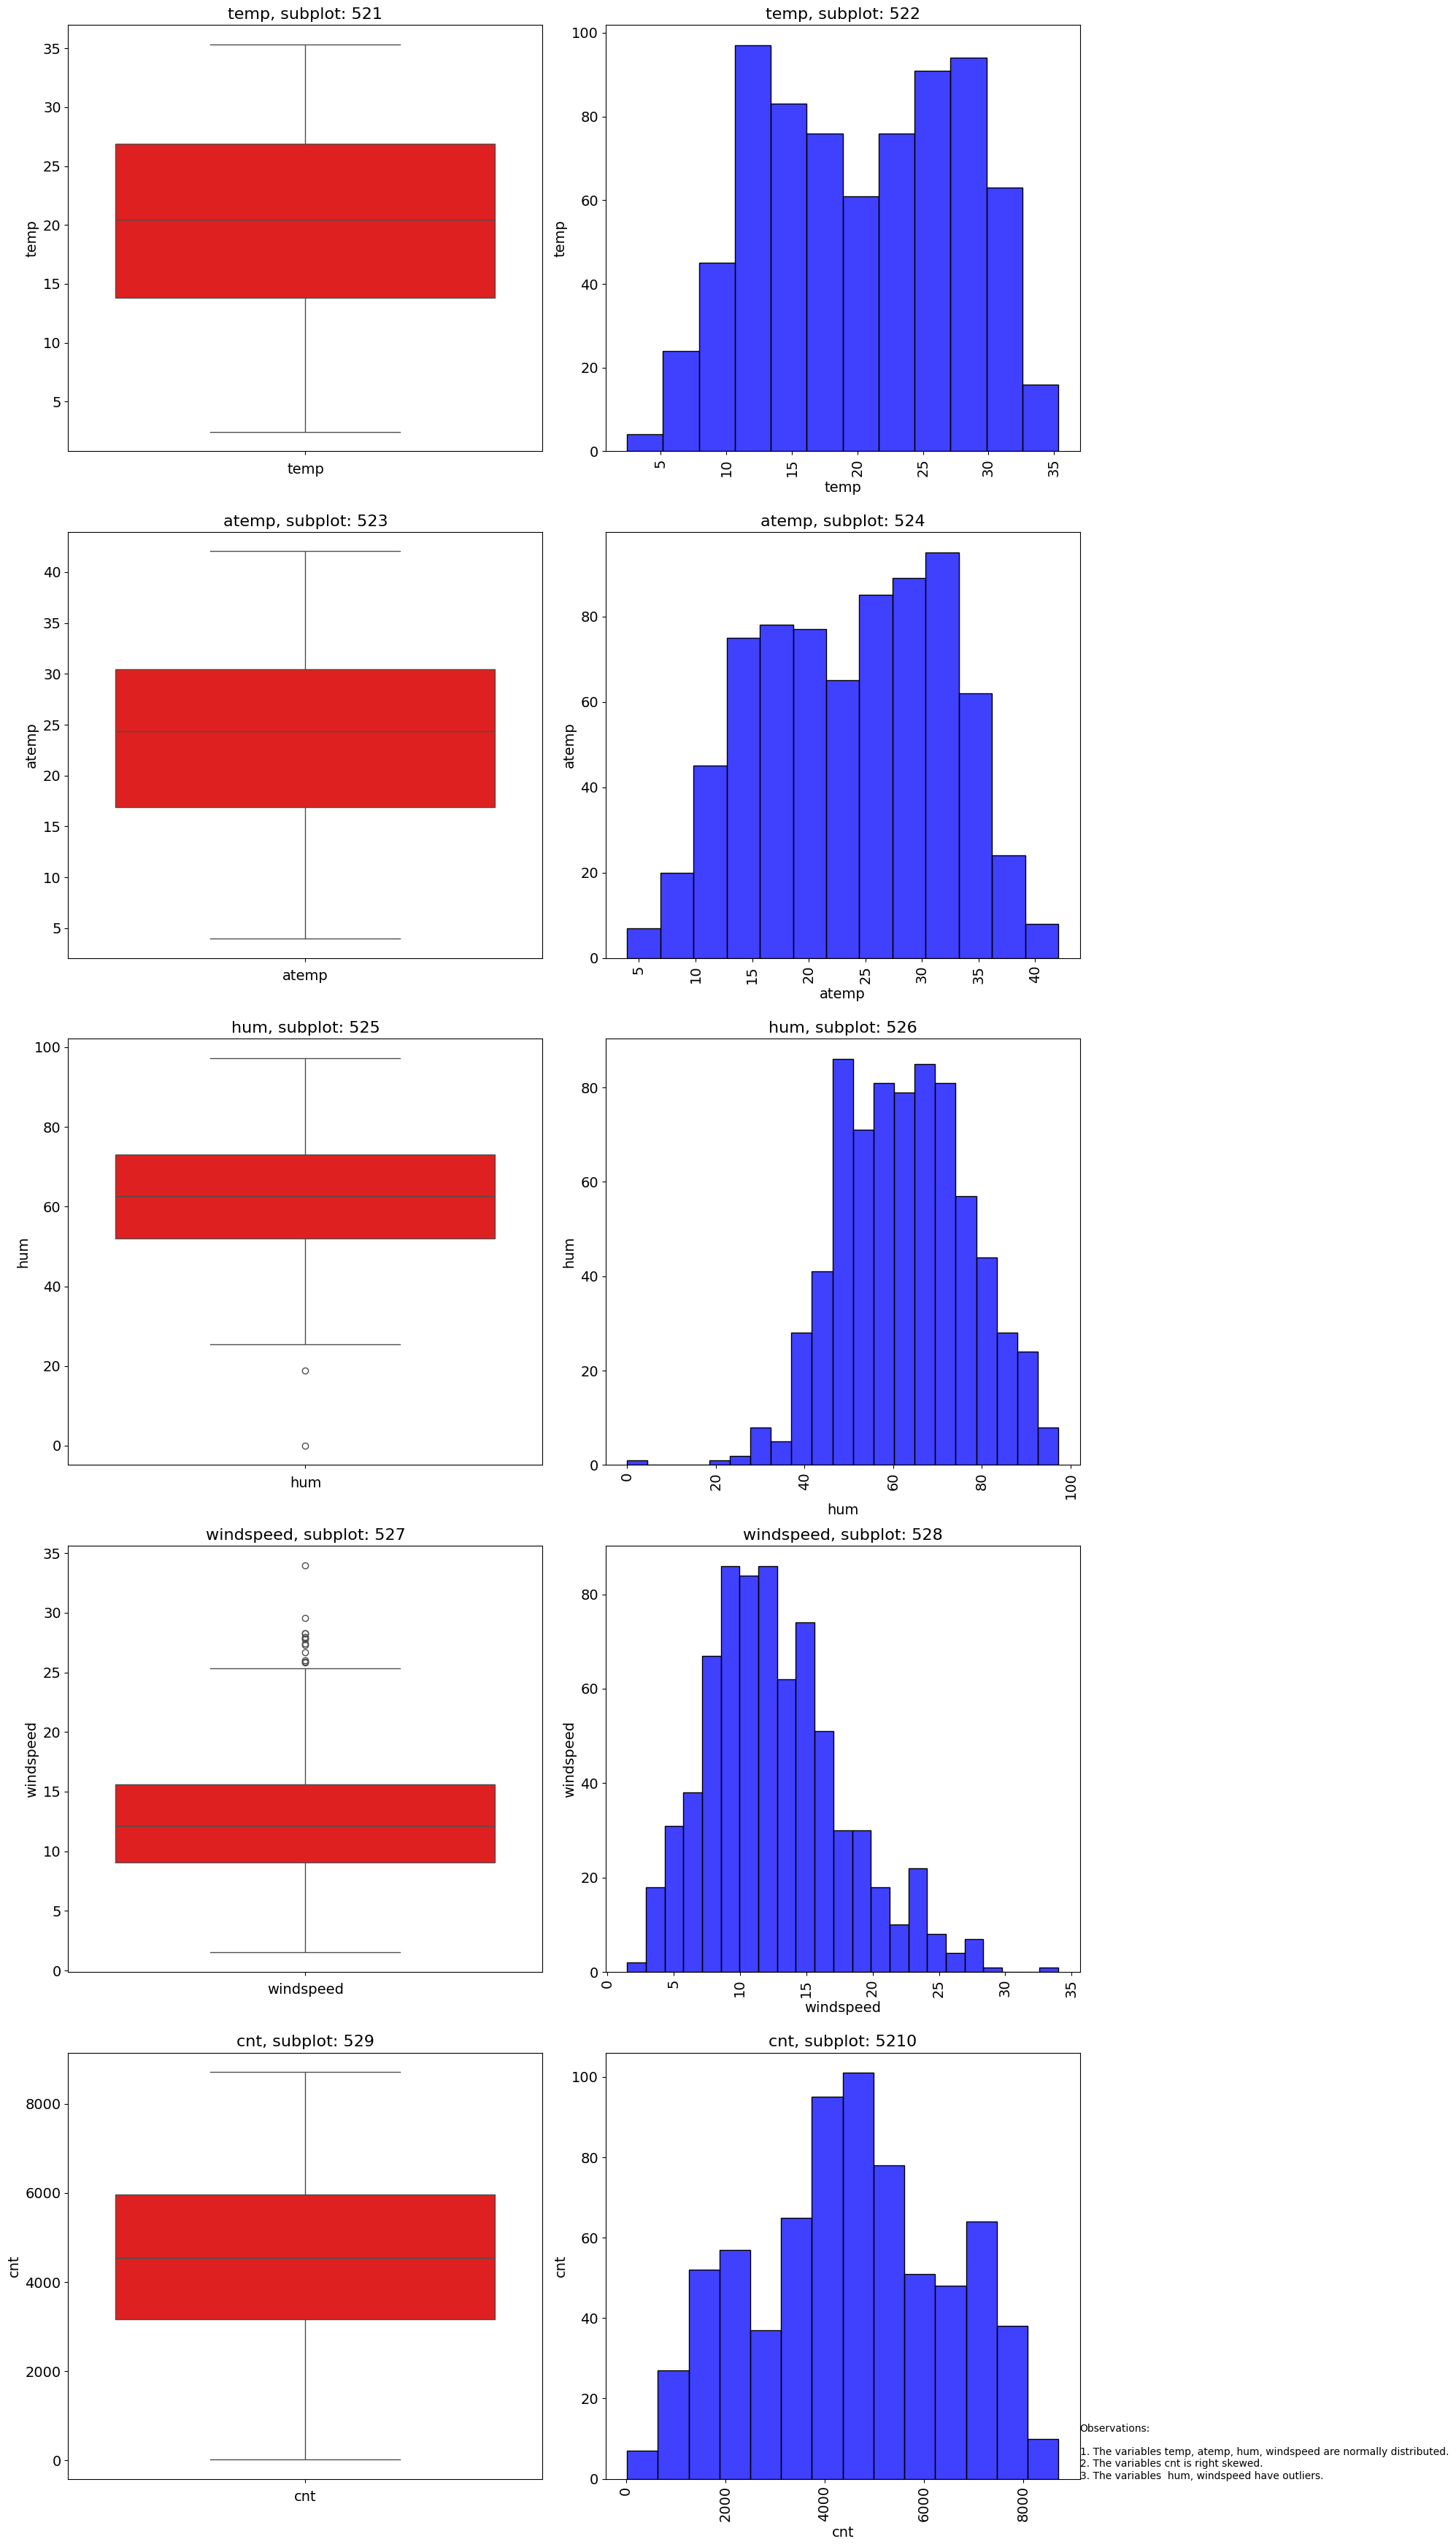

In [326]:
a = 5
b = 2
c = 1

fig = plt.figure(figsize=(30,40))
fig.set_size_inches(15, 35)

for i in num_cols:
    plt.subplot(a,b,c)
    plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=16)
    plt.xlabel(i,fontsize=14)
    plt.ylabel(i,fontsize=14)
    plt.xticks(fontsize=10,rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=14)
    sns.boxplot(num_data[i],color = 'r') #check the estimator 'mean' here by default
    c = c+1

    plt.subplot(a,b,c)
    plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=16)
    plt.xlabel(i,fontsize=14)
    plt.ylabel(i,fontsize=14)
    plt.xticks(fontsize=10,rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=14)
    sns.histplot(num_data[i],color = 'b') #check the estimator 'mean' here by default
    c = c+1
    
  

plt.tight_layout()
plt.annotate('Observations:\n\n1. The variables temp, atemp, hum, windspeed are normally distributed.\n2. The variables cnt is right skewed.\n3. The variables  hum, windspeed have outliers.', xy=(1, 0), xytext=(1, 0), textcoords='axes fraction')
plt.show();

In [327]:
# Outlier treatment - Removing Outliers for hum and windspeed variables 

def treat_outlier(col):
    q1,q3 = col.quantile([0.25,0.75])
    print("First Quartlie- ", q1)
    print("Third Quartlie- ", q3)
    IQR = q3-q1
    print(IQR)
    lower_range = q1-(1.5*IQR)
    upper_range = q3 + (1.5*IQR)
    return lower_range, upper_range



In [328]:
lr,ur = treat_outlier(BikeSharing['hum'])
num_data['hum'] = np.where(num_data['hum']>ur,ur,num_data['hum'])
num_data['hum'] = np.where(num_data['hum']<lr,lr,num_data['hum'])

First Quartlie-  52.0
Third Quartlie-  72.989575
20.989575000000002


In [329]:
#category variables
cat_cols = BikeSharing.select_dtypes(include="category").columns.tolist()
cat_data = BikeSharing[cat_cols]
cat_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,0,Jan,0,Sat,0,mist
1,spring,0,Jan,0,Sun,0,mist
2,spring,0,Jan,0,Mon,1,clear
3,spring,0,Jan,0,Tue,1,clear
4,spring,0,Jan,0,Wed,1,clear


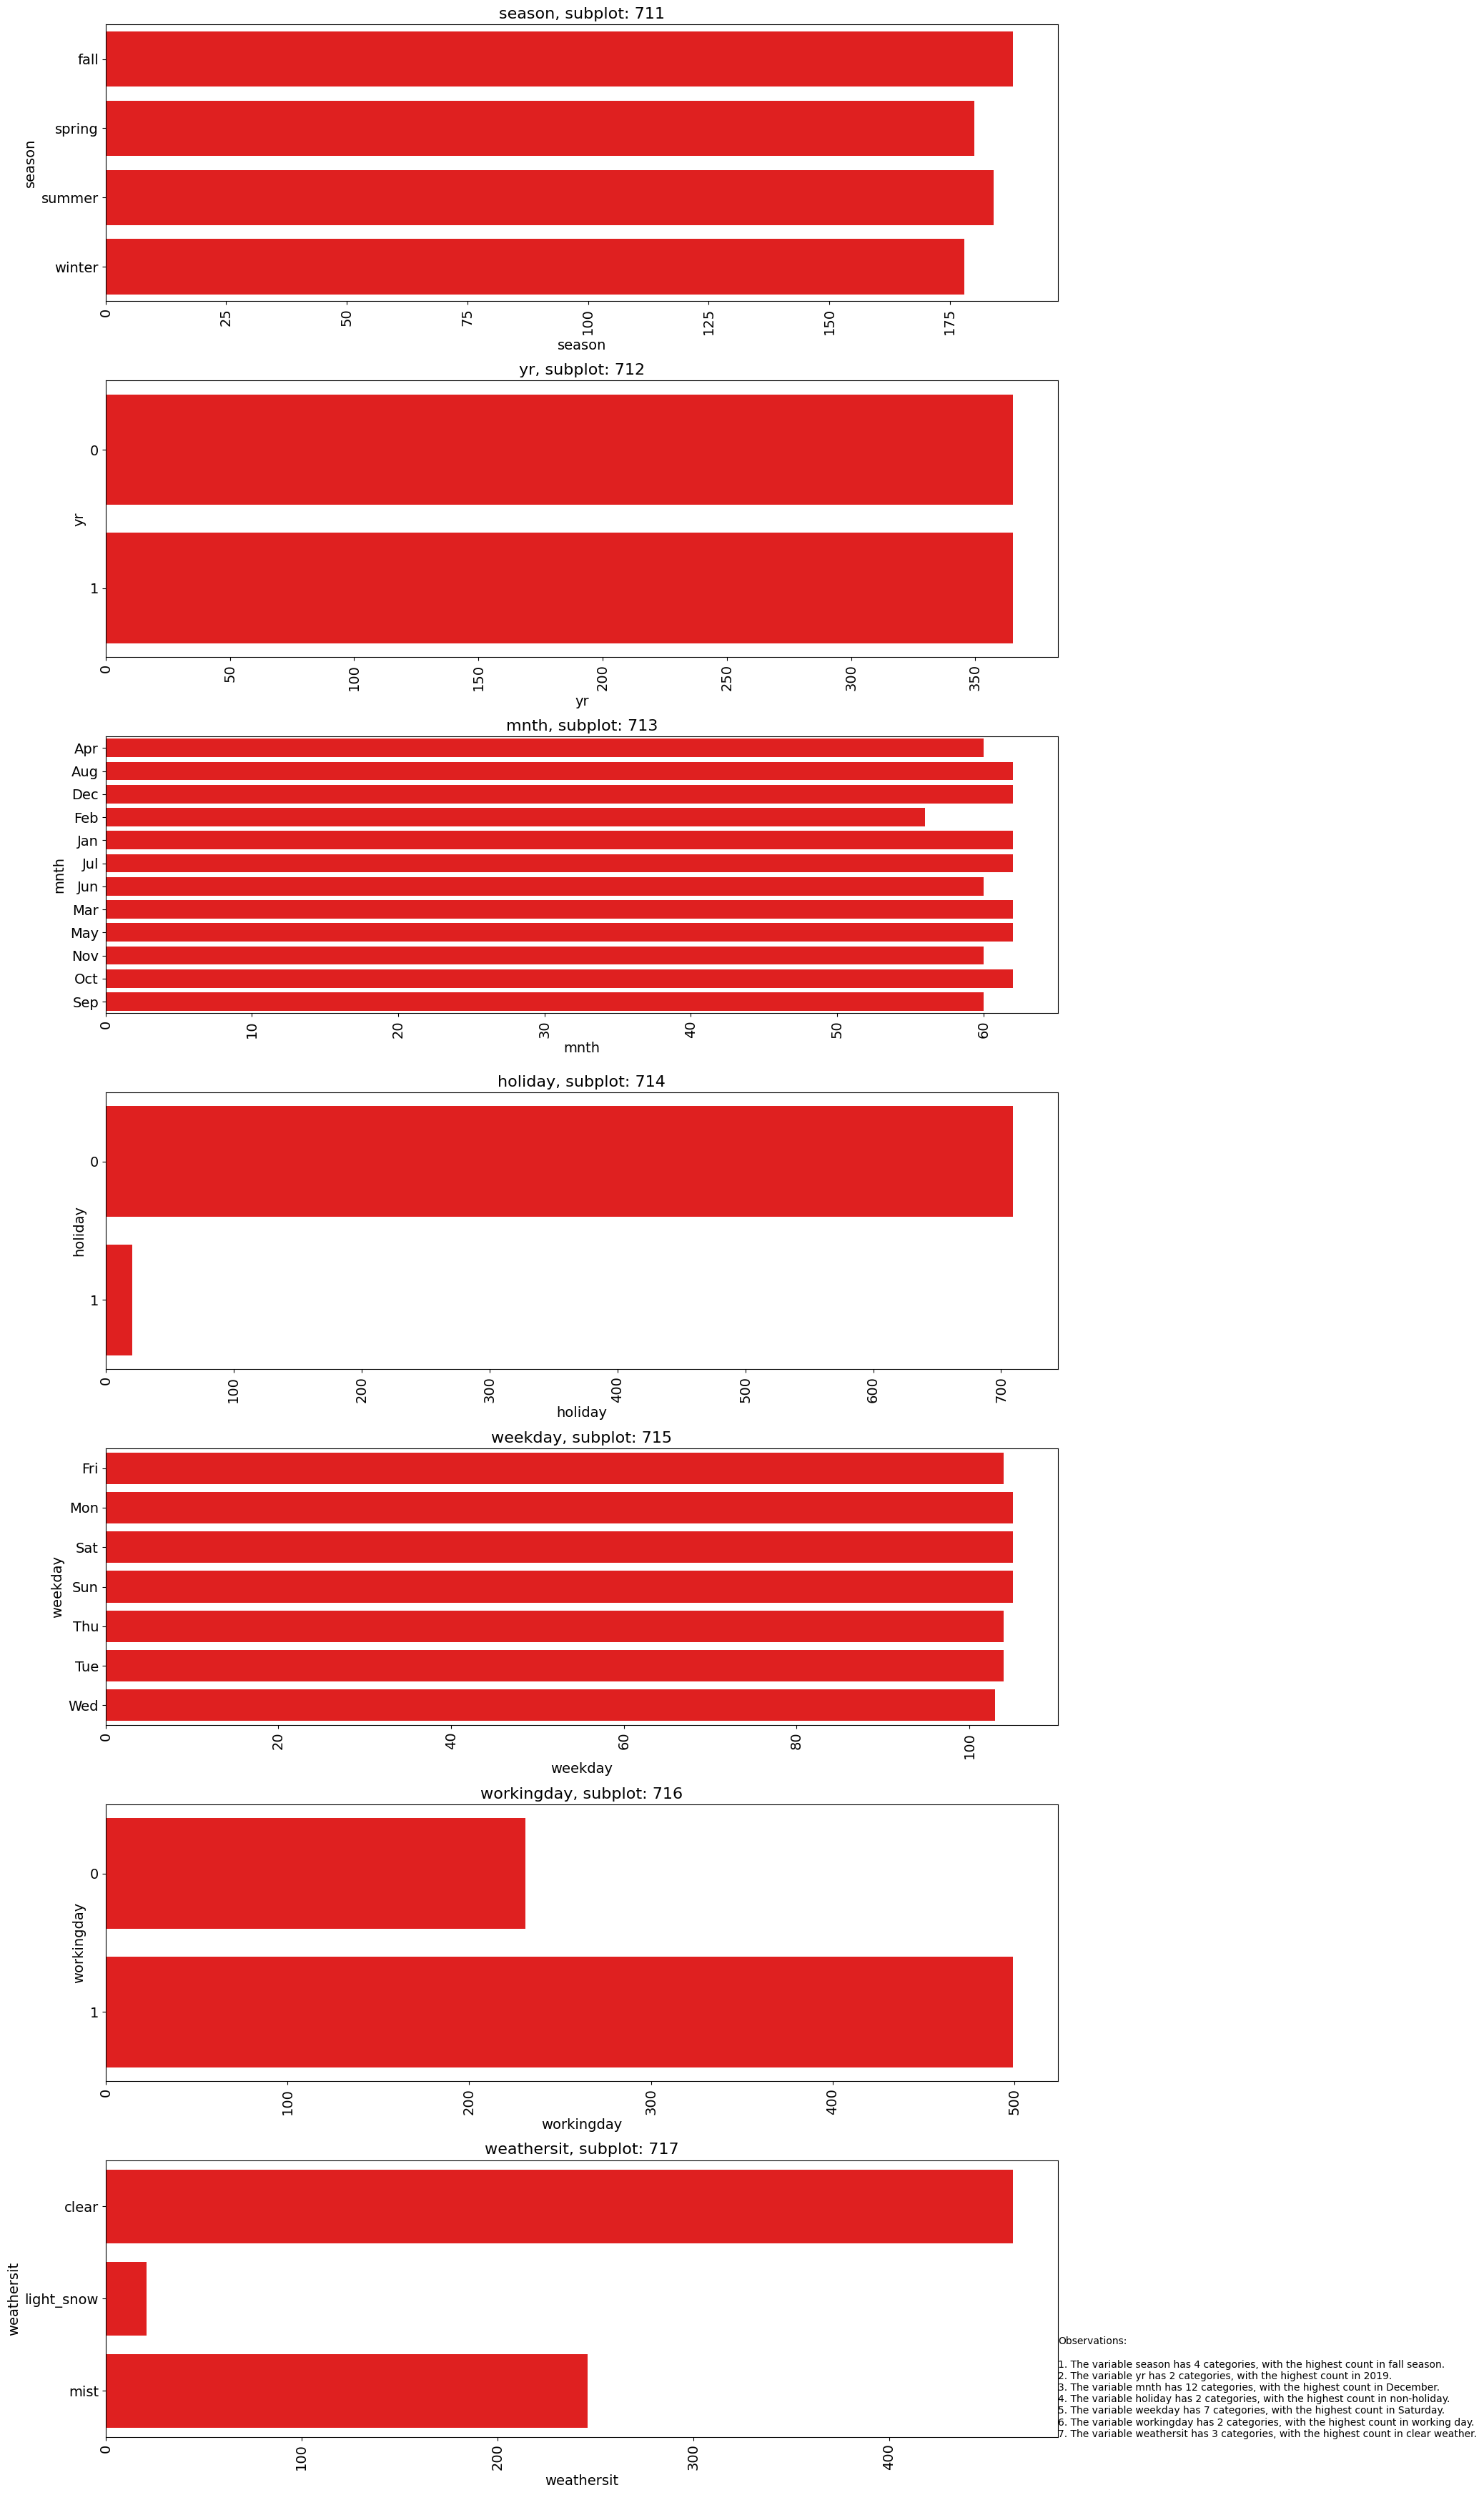

In [330]:
# Plotting the categorical variables
a = 7
b = 1
c = 1

fig = plt.figure(figsize=(30,40))
fig.set_size_inches(15, 35)

for i in cat_cols:
    plt.subplot(a,b,c)
    plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=16)
    plt.xlabel(i,fontsize=14)
    plt.ylabel(i,fontsize=14)
    plt.xticks(fontsize=10,rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=14)
    sns.countplot(cat_data[i],color = 'r') #check the estimator 'mean' here by default
    c = c+1
    
    
plt.tight_layout()
plt.annotate('Observations:\n\n1. The variable season has 4 categories, with the highest count in fall season.\n2. The variable yr has 2 categories, with the highest count in 2019.\n3. The variable mnth has 12 categories, with the highest count in December.\n4. The variable holiday has 2 categories, with the highest count in non-holiday.\n5. The variable weekday has 7 categories, with the highest count in Saturday.\n6. The variable workingday has 2 categories, with the highest count in working day.\n7. The variable weathersit has 3 categories, with the highest count in clear weather.', xy=(1, 0), xytext=(1, 0), textcoords='axes fraction')
plt.show();


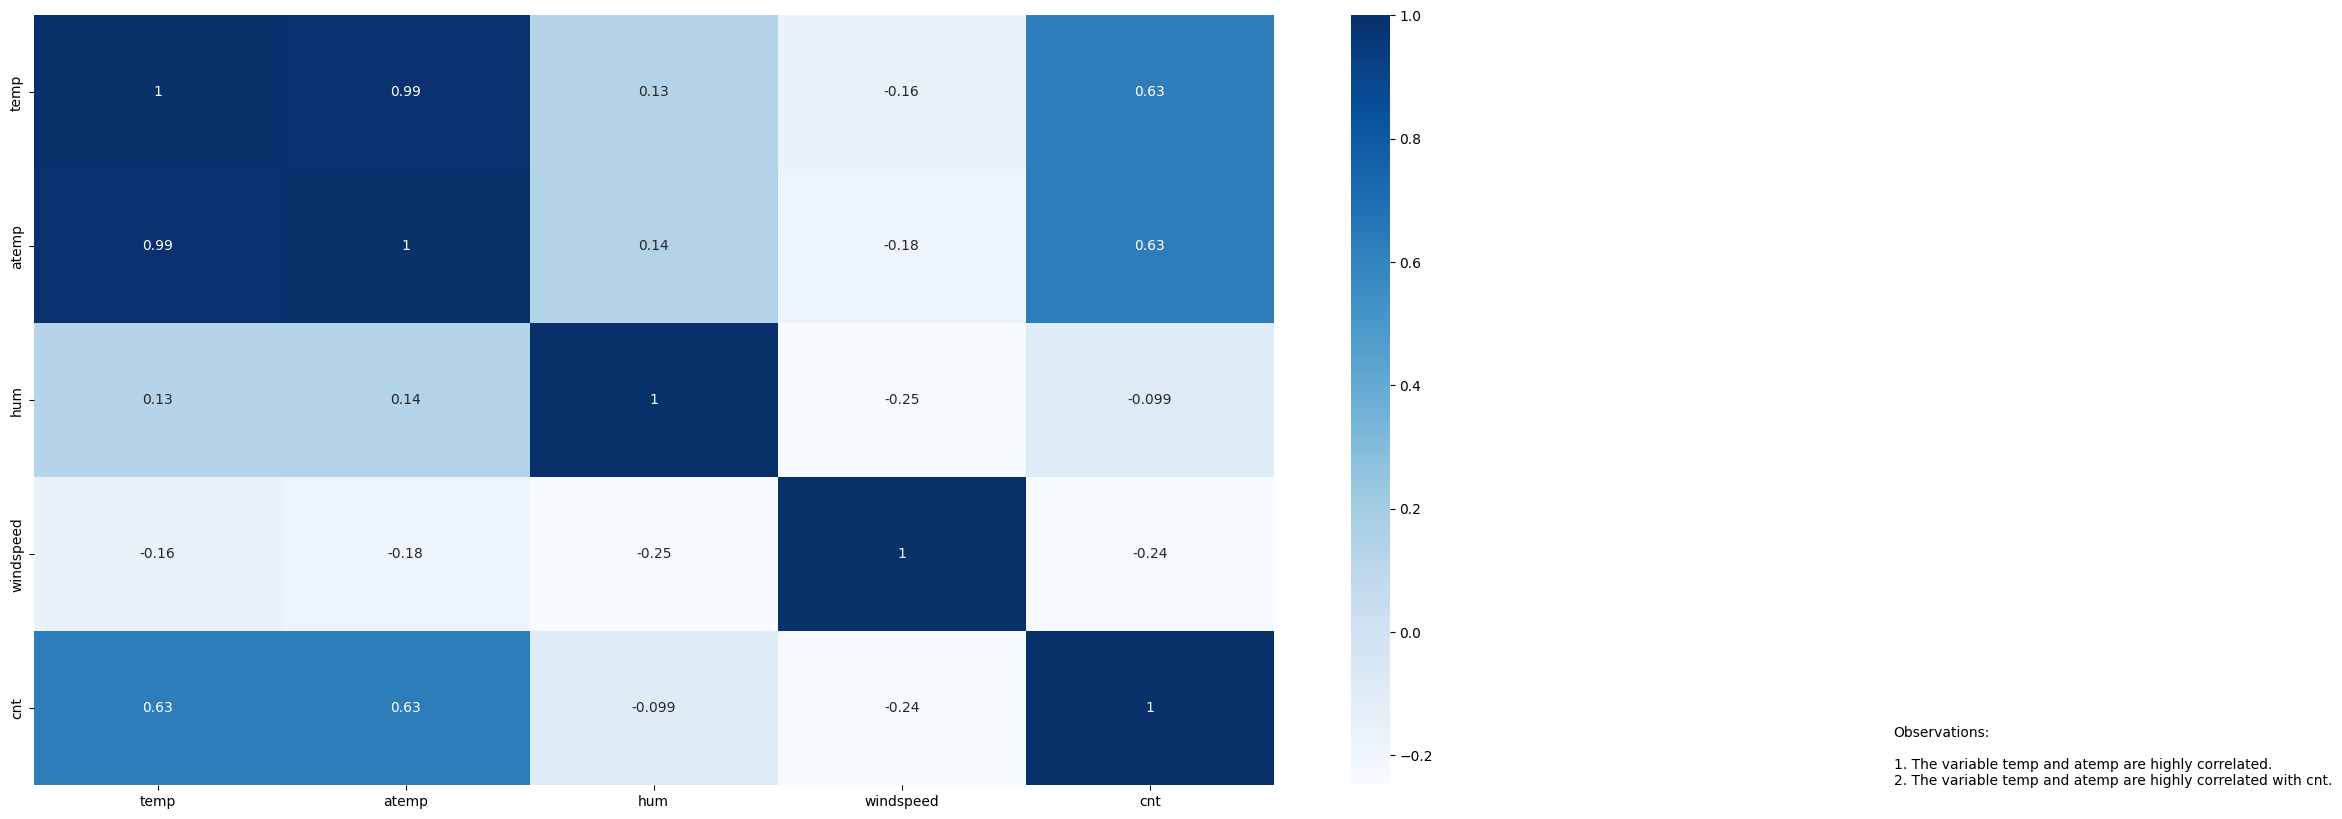

In [331]:
numeric_df = BikeSharing.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues")
plt.annotate('Observations:\n\n1. The variable temp and atemp are highly correlated.\n2. The variable temp and atemp are highly correlated with cnt.', xy=(1.5, 0), xytext=(1.5, 0), textcoords='axes fraction')
plt.show()

Observation : Important variable is temp and atemp

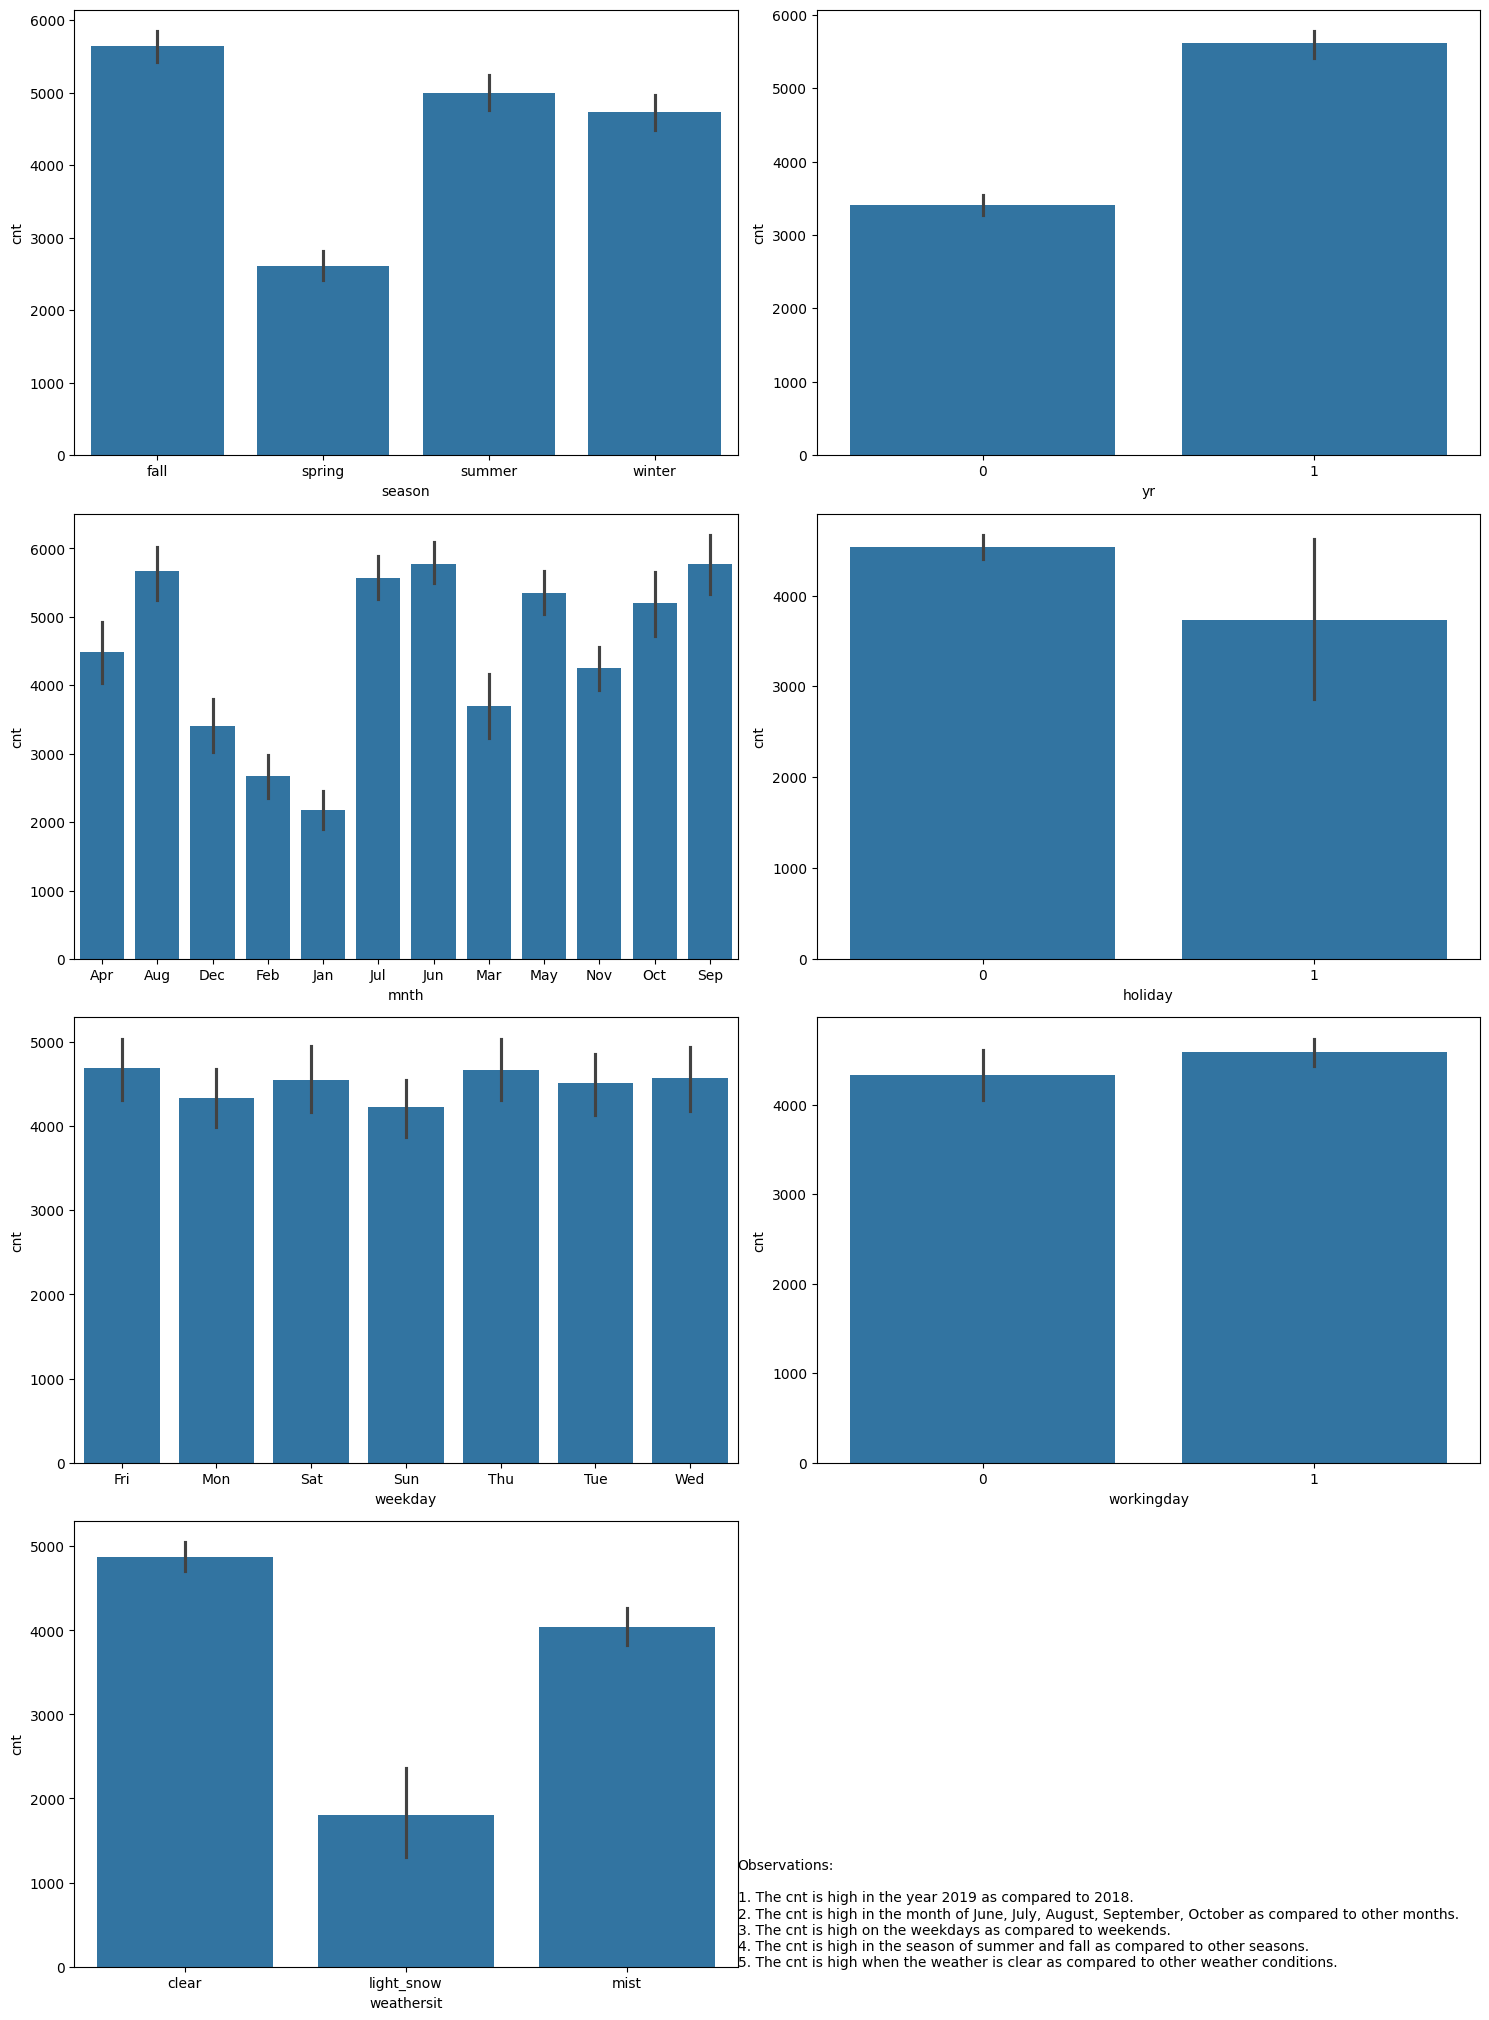

In [332]:
# plotting Barchart for categorical variables and cnt
a = 7
b = 2
c = 1

fig = plt.figure(figsize=(40,40))
fig.set_size_inches(15, 35)

for i in cat_cols:
    plt.subplot(a,b,c)
    sns.barplot(x=i, y='cnt', data=BikeSharing)
    c = c+1
    
    
plt.tight_layout()
plt.annotate('Observations:\n\n1. The cnt is high in the year 2019 as compared to 2018.\n2. The cnt is high in the month of June, July, August, September, October as compared to other months.\n3. The cnt is high on the weekdays as compared to weekends.\n4. The cnt is high in the season of summer and fall as compared to other seasons.\n5. The cnt is high when the weather is clear as compared to other weather conditions.', xy=(1, 0), xytext=(1, 0), textcoords='axes fraction')
plt.show();




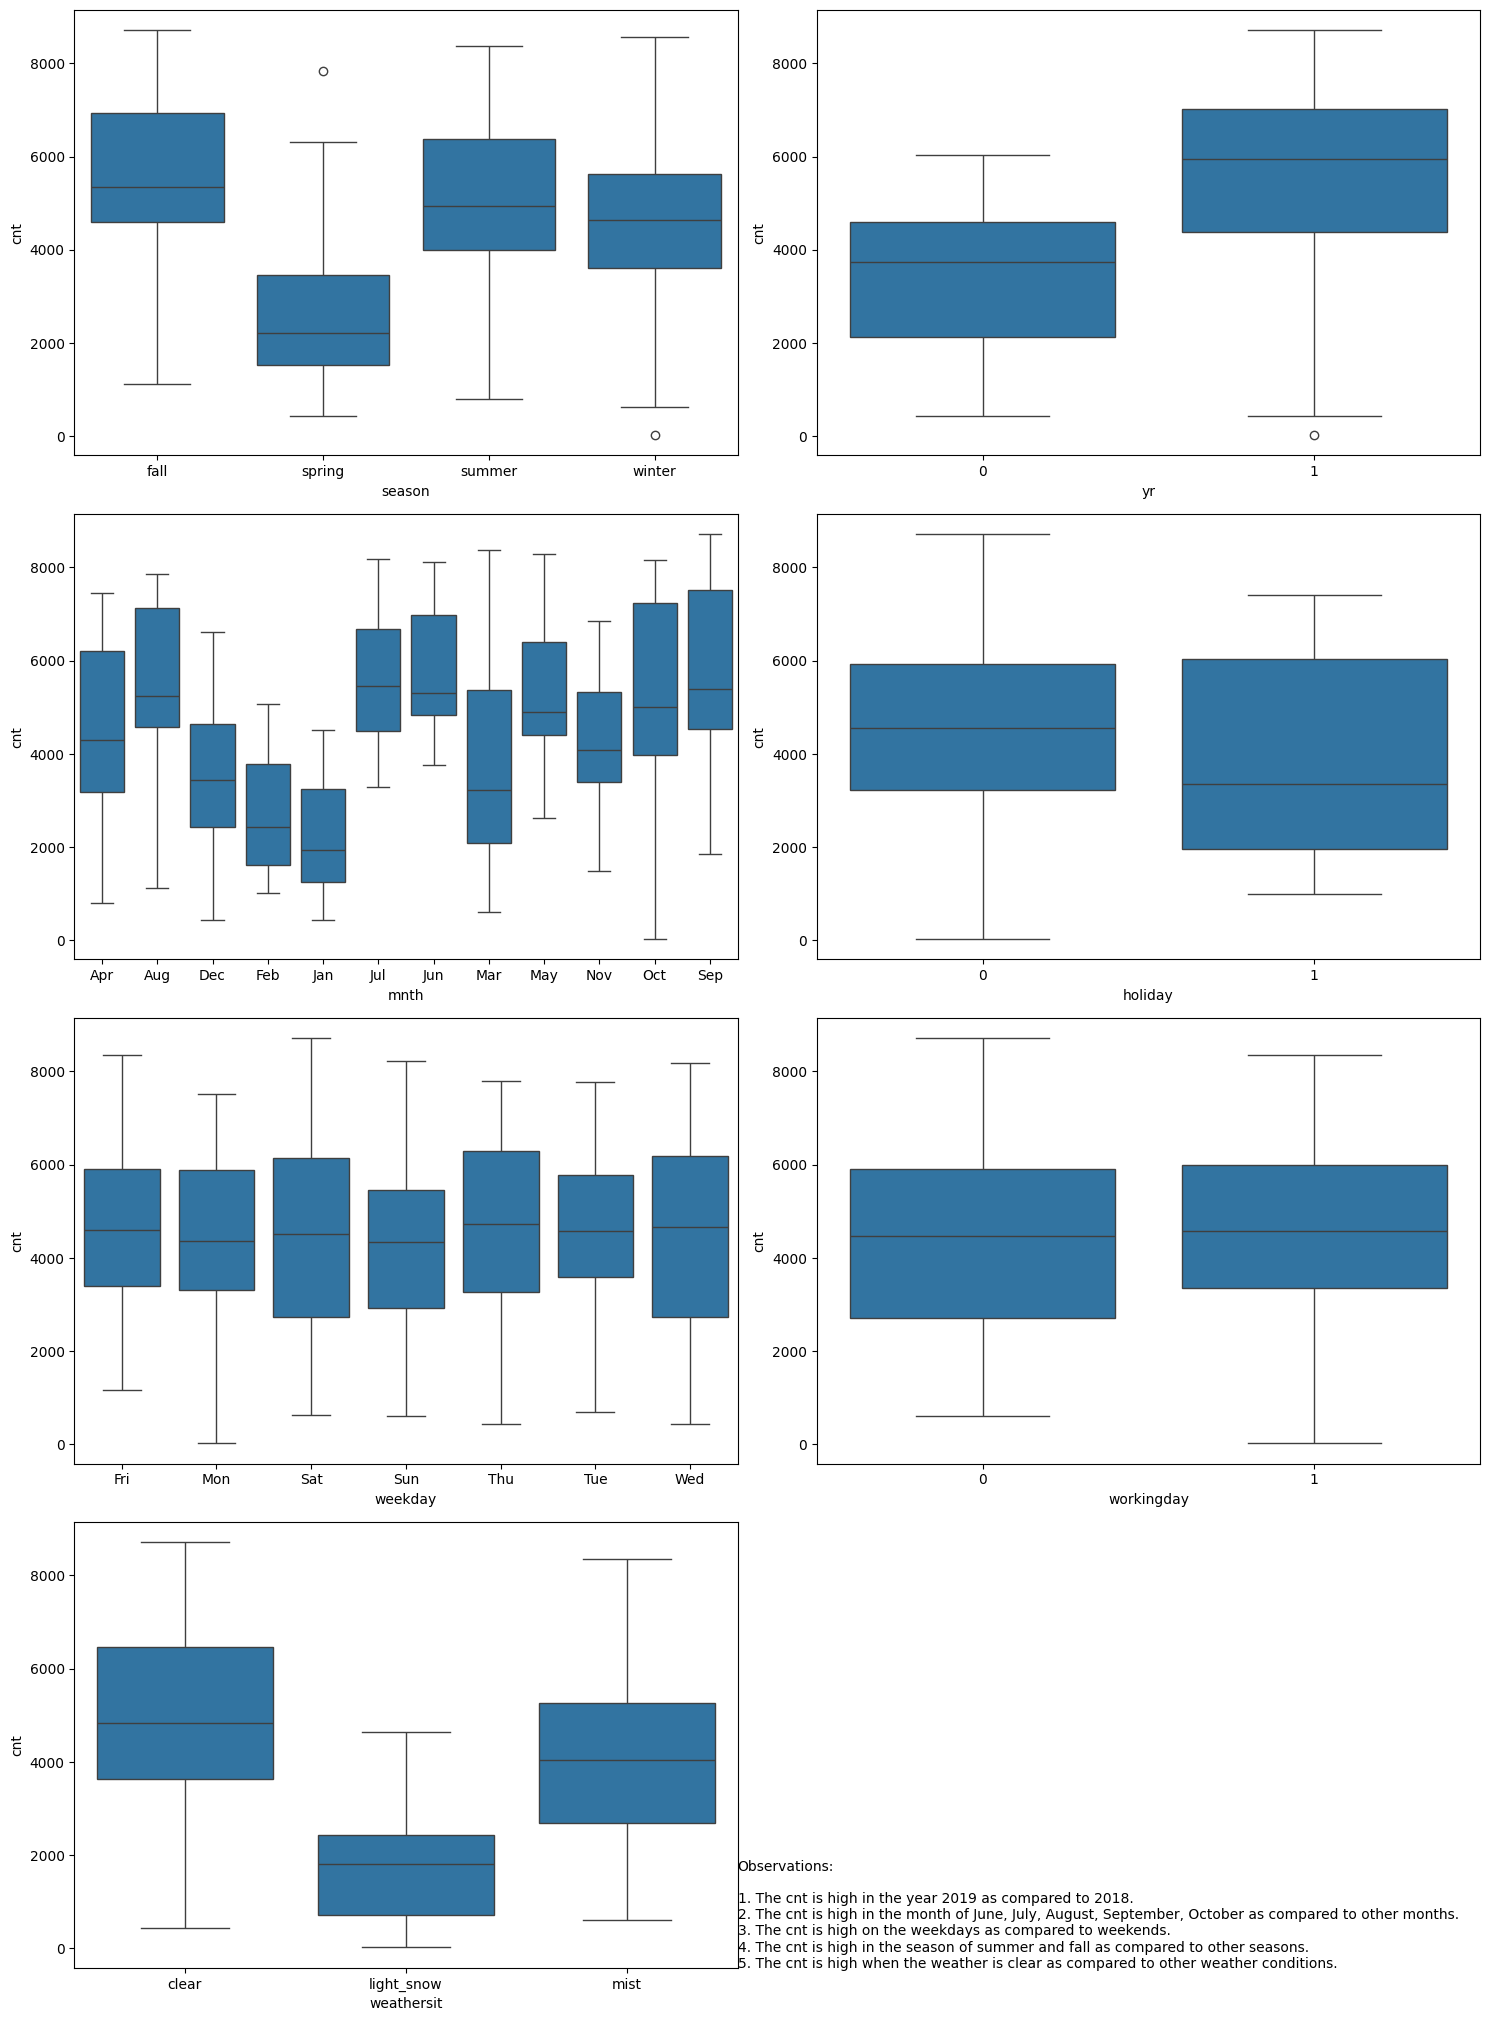

In [333]:
a = 7
b = 2
c = 1

fig = plt.figure(figsize=(40,40))
fig.set_size_inches(15, 35)

for i in cat_cols:
    plt.subplot(a,b,c)
    sns.boxplot(x=i, y='cnt', data=BikeSharing)
    c = c+1
    
    
plt.tight_layout()
plt.annotate('Observations:\n\n1. The cnt is high in the year 2019 as compared to 2018.\n2. The cnt is high in the month of June, July, August, September, October as compared to other months.\n3. The cnt is high on the weekdays as compared to weekends.\n4. The cnt is high in the season of summer and fall as compared to other seasons.\n5. The cnt is high when the weather is clear as compared to other weather conditions.', xy=(1, 0), xytext=(1, 0), textcoords='axes fraction')
plt.show();


<Figure size 2000x1000 with 0 Axes>

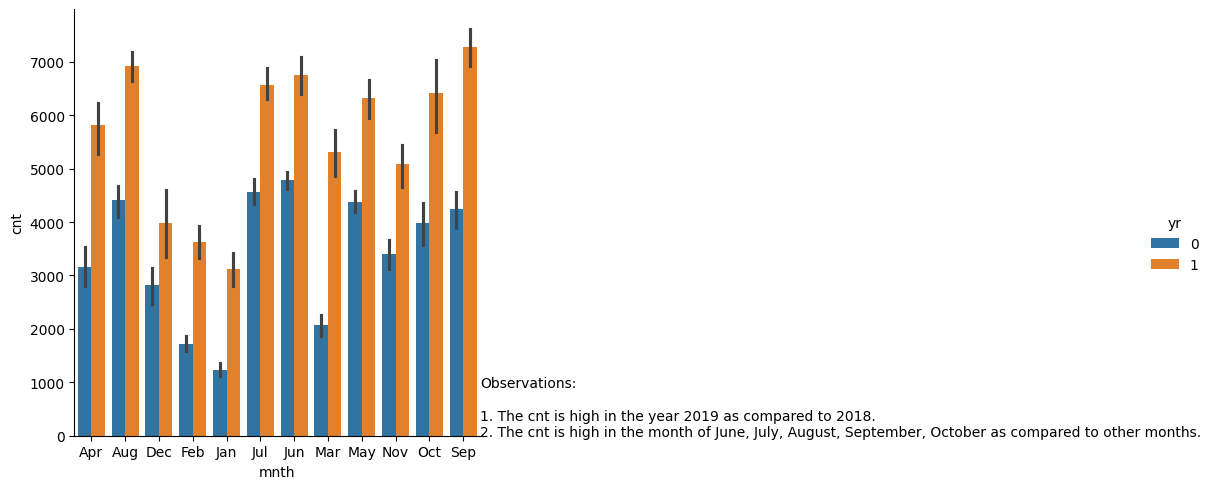

In [334]:

plt.figure(figsize=(20,10))
sns.catplot(x="mnth", y="cnt", hue="yr", kind="bar", data=BikeSharing)
plt.annotate('Observations:\n\n1. The cnt is high in the year 2019 as compared to 2018.\n2. The cnt is high in the month of June, July, August, September, October as compared to other months.', xy=(1, 0), xytext=(1, 0), textcoords='axes fraction')
plt.show();

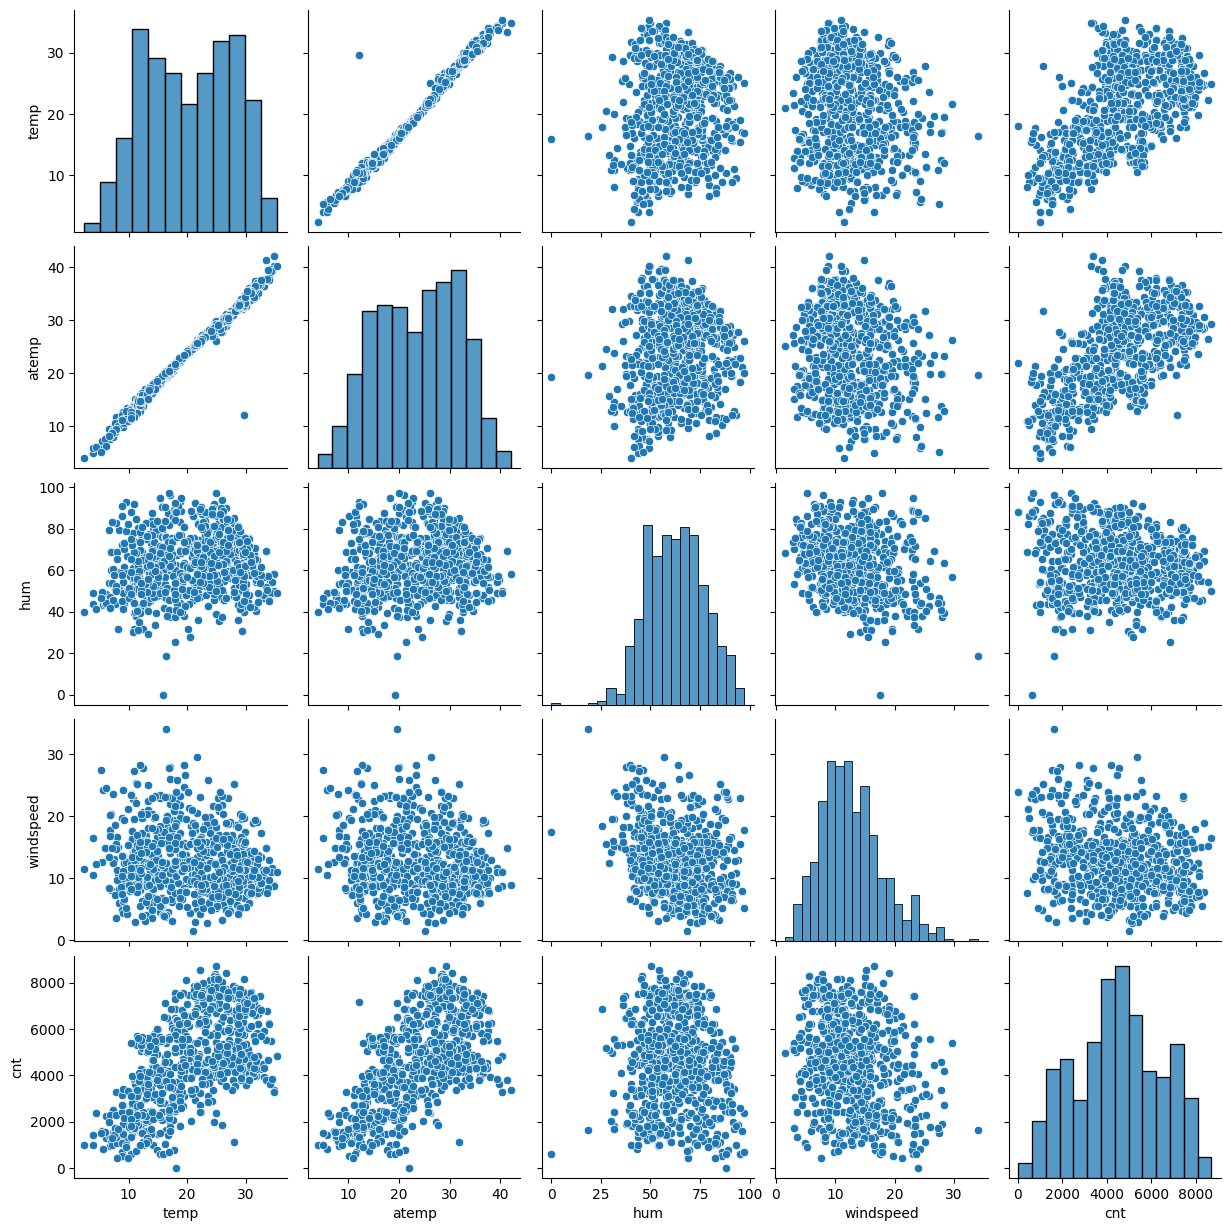

In [335]:
sns.pairplot(BikeSharing)
plt.show();

In [336]:
# Dropping the variables temp as temp and atemp have high correlation
BikeSharing.drop(['temp'],axis=1,inplace=True)



Encoding

In [337]:
# Dummy variables for categorical variables where the categories are more than 2

BikeSharing = pd.concat([BikeSharing, pd.get_dummies(BikeSharing['mnth'], drop_first=True,dtype='int8')], axis=1)
BikeSharing = pd.concat([BikeSharing, pd.get_dummies(BikeSharing['weekday'], drop_first=True,dtype='int8')], axis=1)
BikeSharing = pd.concat([BikeSharing, pd.get_dummies(BikeSharing['season'], drop_first=True,dtype='int8')], axis=1)
BikeSharing = pd.concat([BikeSharing, pd.get_dummies(BikeSharing['weathersit'], drop_first=True,dtype='int8')], axis=1)
BikeSharing['holiday']= BikeSharing['holiday'].astype('int8')
BikeSharing['yr']= BikeSharing['yr'].astype('int8')
BikeSharing.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,...,Sat,Sun,Thu,Tue,Wed,spring,summer,winter,light_snow,mist
0,2018-01-01,spring,0,Jan,0,Sat,0,mist,18.18125,80.5833,...,1,0,0,0,0,1,0,0,0,1
1,2018-01-02,spring,0,Jan,0,Sun,0,mist,17.68695,69.6087,...,0,1,0,0,0,1,0,0,0,1
2,2018-01-03,spring,0,Jan,0,Mon,1,clear,9.47025,43.7273,...,0,0,0,0,0,1,0,0,0,0
3,2018-01-04,spring,0,Jan,0,Tue,1,clear,10.60610,59.0435,...,0,0,0,1,0,1,0,0,0,0
4,2018-01-05,spring,0,Jan,0,Wed,1,clear,11.46350,43.6957,...,0,0,0,0,1,1,0,0,0,0


Train Test split

In [338]:
#test train split
from sklearn.model_selection import train_test_split
X = BikeSharing.drop(['dteday','mnth','weekday','season','weathersit'],axis=1)
np.random.seed(0)
X_train, X_test = train_test_split(X, train_size = 0.7, test_size=0.3, random_state=100)


In [339]:
print(X_train.shape)
print(X_test.shape)

(510, 29)
(219, 29)


Standard Scaling

In [340]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['cnt','atemp','hum','windspeed']] = scaler.fit_transform(X_train[['cnt','atemp','hum','windspeed']])
X_train.head()   
 

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,spring,summer,winter,light_snow,mist
653,1,0,1,-0.055878,-0.514725,-0.117752,1.562685,0,0,0,...,0,0,0,1,0,0,0,1,0,0
576,1,0,1,1.194106,0.516433,-0.330615,1.399629,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,-0.348834,-0.069854,-0.385694,-0.215554,0,0,0,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,-1.473492,-1.045032,2.018143,-1.379511,0,1,0,...,0,1,0,0,0,1,0,0,0,0
482,1,0,0,-0.571474,-1.000840,-0.779889,-0.136589,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [341]:
y_train = X_train.pop('cnt')
X_train.head()  
y_train.head()


653    1.562685
576    1.399629
426   -0.215554
728   -1.379511
482   -0.136589
Name: cnt, dtype: float64

Transform test data

In [342]:
# Transforming test data
X_test[['cnt','atemp','hum','windspeed']] = scaler.transform(X_test[['cnt','atemp','hum','windspeed']])
X_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,spring,summer,winter,light_snow,mist
184,0,1,0,1.209703,0.047995,-1.394498,0.798166,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,1.553413,-0.276087,-0.984730,0.884309,0,0,0,...,0,0,0,0,1,0,1,0,0,0
299,0,0,1,-0.079386,1.285378,0.079219,-0.937002,0,0,0,...,0,0,1,0,0,0,0,1,0,1
221,0,0,1,1.330748,-1.463381,0.110839,0.150554,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,1.076847,-2.305983,1.277165,0.246953,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [343]:
y_test = X_test.pop('cnt')
X_test.head()
y_test.head()

184    0.798166
535    0.884309
299   -0.937002
221    0.150554
152    0.246953
Name: cnt, dtype: float64

Fearure selection using RFE

In [344]:
# Feature Selection using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator = lm,
          n_features_to_select = 15,
          verbose=True)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)



Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


In [345]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col
    

Index(['yr', 'holiday', 'workingday', 'atemp', 'Dec', 'Feb', 'Jan', 'Jul',
       'Nov', 'Sep', 'Sat', 'spring', 'winter', 'light_snow', 'mist'],
      dtype='object')

Feature selection using p-value and VIF

In [346]:
# Feature selection using p-value and VIF
import statsmodels.api as sm
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          7.66e-181
Time:                        15:12:31   Log-Likelihood:                -267.42
No. Observations:                 510   AIC:                             566.8
Df Residuals:                     494   BIC:                             634.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4447      0.061     -7.234      0.0

In [347]:
# Dropping the variable 'Aug' as it has high p-value
X_train_rfe.drop(['Feb'],axis=1,inplace=True) # p<=0.05
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          2.06e-181
Time:                        15:12:31   Log-Likelihood:                -268.76
No. Observations:                 510   AIC:                             567.5
Df Residuals:                     495   BIC:                             631.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4518      0.061     -7.357      0.0

In [348]:
# Dropping the variable 'Aug' as it has high p-value
X_train_rfe.drop(['holiday'],axis=1,inplace=True) # p<=0.05
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.7
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          6.05e-182
Time:                        15:12:31   Log-Likelihood:                -270.22
No. Observations:                 510   AIC:                             568.4
Df Residuals:                     496   BIC:                             627.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4813      0.059     -8.160      0.0

In [349]:
# check vif values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,spring,2.946582
2,atemp,2.839709
1,workingday,2.675487
10,winter,2.670029
0,yr,1.874487
6,Nov,1.816731
4,Jan,1.740693
3,Dec,1.538608
12,mist,1.520992
8,Sat,1.383649


Test Data Preparation

In [350]:
# test data
X_test_rfe = X_test[col]
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.drop(['holiday','Feb'],axis=1,inplace=True)
X_test_rfe.columns

Index(['const', 'yr', 'workingday', 'atemp', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep',
       'Sat', 'spring', 'winter', 'light_snow', 'mist'],
      dtype='object')

## Predictions

Train Data

In [351]:
# Making predictions
y_train_pred = lm.predict(X_train_rfe)
y_test_pred = lm.predict(X_test_rfe)

print(y_test_pred[0:5])
print(y_test_pred.shape,y_test.shape)

184   -0.583532
535    1.467767
299   -0.321839
221    0.328165
152    0.220721
dtype: float64
(219,) (219,)


In [352]:
from sklearn.linear_model import LinearRegression

In [353]:
lm = LinearRegression()
lm

LinearRegression()

In [354]:
lm_model = lm.fit(X_train_rfe,y_train)
lm_model

LinearRegression()

In [355]:
# print intercept and coefficients
print(lm_model.intercept_)
for idx, col_name in enumerate(X_train_rfe.columns):
    print("The coefficient for {} is {}".format(col_name, lm_model.coef_[idx]))


-0.48129988970864085
The coefficient for const is 0.0
The coefficient for yr is 1.0453765170308833
The coefficient for workingday is 0.2463271415558354
The coefficient for atemp is 0.42317379617180456
The coefficient for Dec is -0.2030529504861534
The coefficient for Jan is -0.18296662839607275
The coefficient for Jul is -0.24868679181067863
The coefficient for Nov is -0.24222612735684929
The coefficient for Sep is 0.265566341297322
The coefficient for Sat is 0.2861545190759465
The coefficient for spring is -0.49637936469075444
The coefficient for winter is 0.3121876548319418
The coefficient for light_snow is -1.3724432276799805
The coefficient for mist is -0.3654599879445887


Accuracy:

In [356]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

In [357]:
print("R2 score",lm_model.score(X_train_rfe,y_train))
print("MAE Score",mean_absolute_error(y_train,y_train_pred))
print("MSE Score",mean_squared_error(y_train,y_train_pred))


R2 score 0.8310560511529486
MAE Score 0.3004073940500718
MSE Score 0.1689439488470514


In [358]:
print("R2 score",lm_model.score(X_test_rfe,y_test))
print("MAE Score",mean_absolute_error(y_test,y_test_pred))
print("MSE Score",mean_squared_error(y_test,y_test_pred))


R2 score 0.826938104315981
MAE Score 0.3100192527041111
MSE Score 0.16327447985506863


In [359]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8269381043159809

Observation : Achieved R2 Score of 0.83 for Training Data and 0.826 for test data

### Plotting the Data

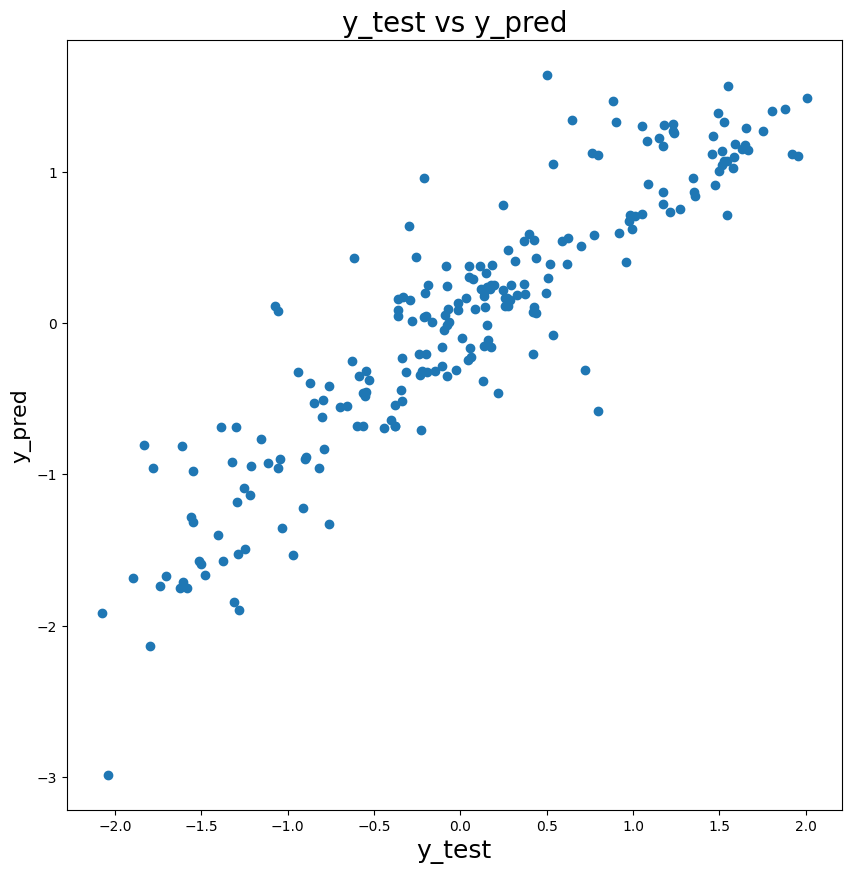

In [360]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize=(10,10))
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

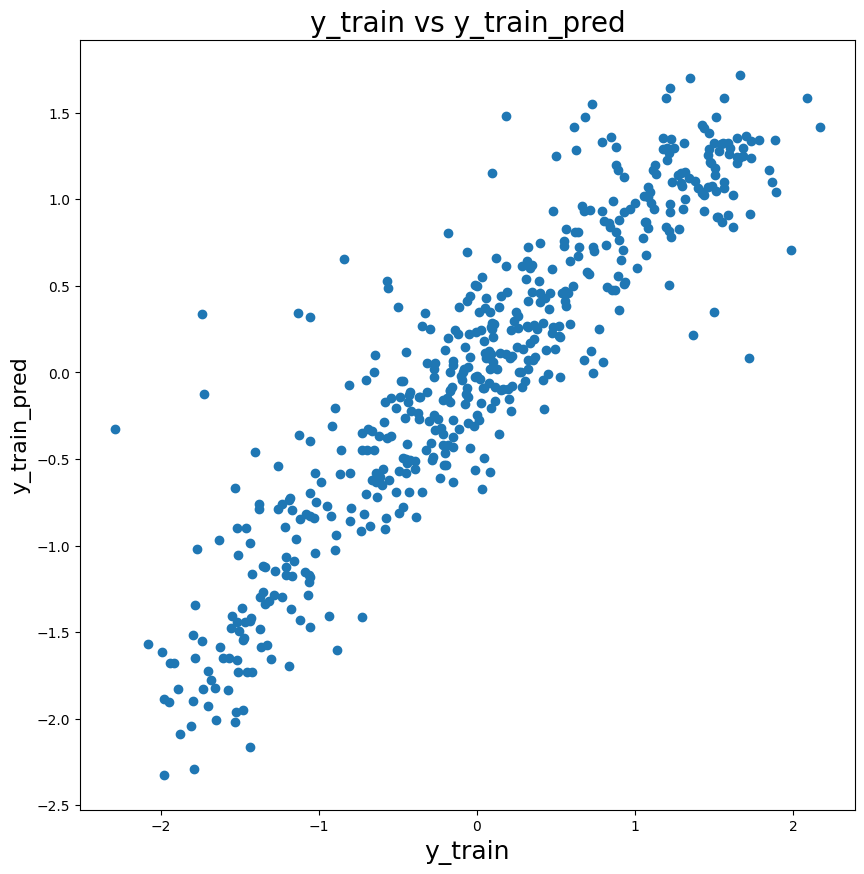

In [361]:
# Plotting y_train and y_train_pred to understand the spread
fig = plt.figure(figsize=(10,10))
plt.scatter(y_train,y_train_pred)
plt.title('y_train vs y_train_pred', fontsize=20)              # Plot heading
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label
plt.show()

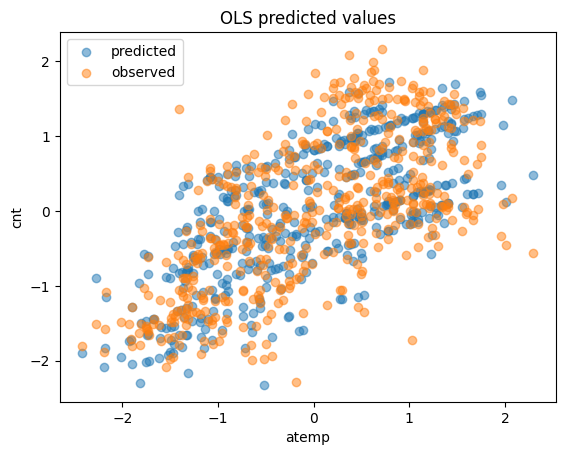

In [362]:
x = X_train['atemp']
fix, ax = plt.subplots()
ax.scatter(x, y_train_pred, alpha=0.5,
        label='predicted')

# Plot observed values
ax.scatter(x, y_train, alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('atemp')
ax.set_ylabel('cnt')
plt.show()

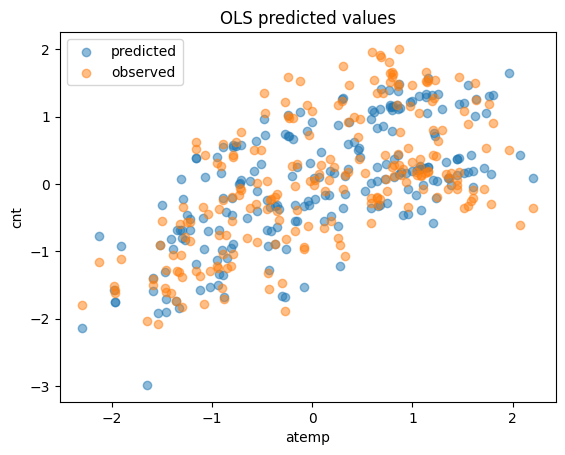

In [363]:
# Plot predicted values
x_test = X_test['atemp']
fix, ax = plt.subplots()
ax.scatter(x_test, y_test_pred, alpha=0.5,label='predicted')

# Plot observed values
ax.scatter(x_test, y_test, alpha=0.5,label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('atemp')
ax.set_ylabel('cnt')
plt.show()

Observation : Predicted and observed values distributed evenly

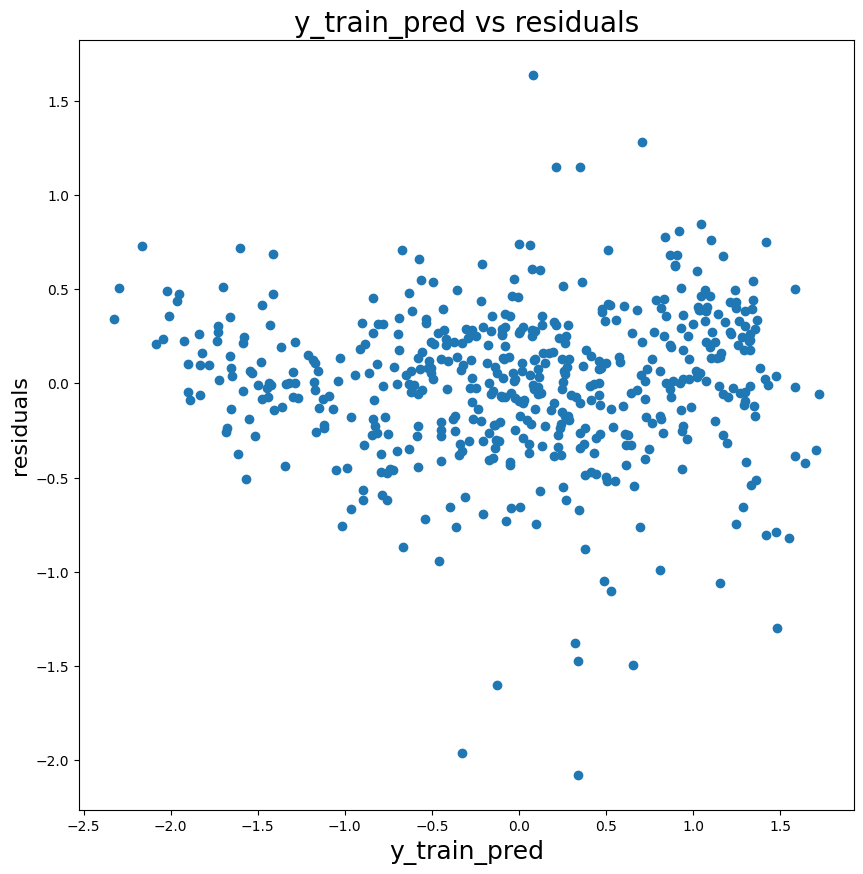

In [364]:
# predicted vs residuals
fig = plt.figure(figsize=(10,10))
plt.scatter(y_train_pred,y_train-y_train_pred)
plt.title('y_train_pred vs residuals', fontsize=20)              # Plot heading
plt.xlabel('y_train_pred', fontsize=18)                          # X-label
plt.ylabel('residuals', fontsize=16)                          # Y-label
plt.show()


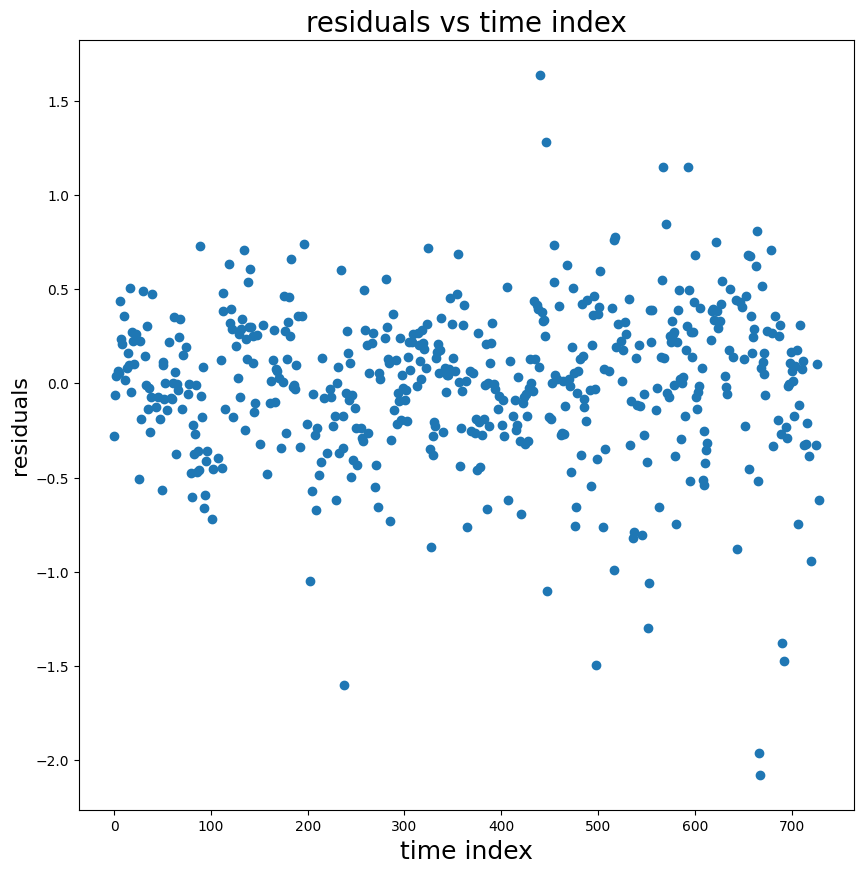

In [365]:
#residuals vs time index
fig = plt.figure(figsize=(10,10))
plt.scatter(y_train.index,y_train-y_train_pred)
plt.title('residuals vs time index', fontsize=20)              # Plot heading
plt.xlabel('time index', fontsize=18)                          # X-label
plt.ylabel('residuals', fontsize=16)                          # Y-label
plt.show()


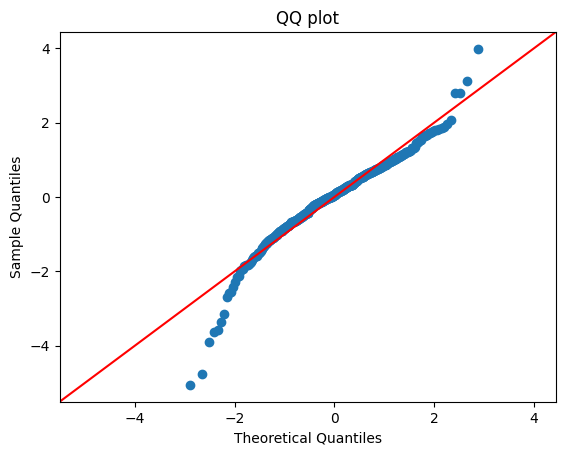

In [368]:
# qploting the residuals
import statsmodels.api as sm
fig = sm.qqplot(y_train-y_train_pred,fit=True,line='45')
plt.title('QQ plot')
plt.show()